In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load in some data to make into a spectogram

In [5]:
finger_names = ['Thumb', 'Index', 'Middle', 'Ring', 'Pinky']
myo_cols = ["Channel_1", "Channel_2", "Channel_3", "Channel_4", "Channel_5", "Channel_6", "Channel_7", "Channel_8"]

data = pd.read_csv("myo_raw_glove2.csv")

In [3]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Thumb,Index,Middle,Ring,Pinky
0,22,30,116,106,50,47,38,24,511,511,511,511,511
1,21,39,110,150,53,44,36,26,511,511,511,511,511
2,28,49,139,151,56,44,35,28,511,511,511,511,511
3,31,51,146,154,65,48,33,30,511,511,511,511,511
4,45,60,181,142,76,59,33,29,511,511,511,511,511


In [4]:
data.describe()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Thumb,Index,Middle,Ring,Pinky
count,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000
mean,82.909960,73.796614,202.746262,184.734609,63.363566,50.434916,57.432168,59.612357,203.941733,197.805409,154.055299,430.992964,299.428760
std,108.471592,67.047883,87.193534,55.276596,14.464381,20.399726,69.738552,82.147746,220.253798,219.607316,228.809844,274.372907,239.609907
min,16.000000,20.000000,42.000000,29.000000,33.000000,23.000000,17.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,38.000000,141.000000,148.000000,55.000000,40.000000,26.000000,23.000000,80.000000,79.000000,0.000000,223.000000,130.000000
50%,32.000000,53.000000,184.500000,177.000000,61.500000,46.000000,31.000000,30.000000,118.000000,113.000000,44.000000,327.000000,220.000000
75%,102.000000,82.000000,247.000000,213.000000,69.000000,55.000000,56.000000,55.000000,183.000000,173.000000,205.000000,647.000000,405.000000
max,1240.000000,894.000000,688.000000,526.000000,313.000000,452.000000,786.000000,911.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000


In [6]:
# Make a copy of our data
df = data.copy(deep=True)

<AxesSubplot:>

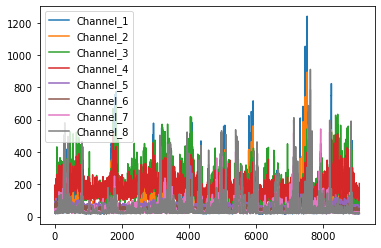

In [7]:
df[myo_cols].plot()

## Making a spectrogram

The data we have gathered, is rectified and filtered so it must have been gathered with mode 0x01 (50 Hz)   
If it was between -128 and 127, we know it must have been gathered with mode 0x03 - 200Hz

In [20]:
sampled_freq = 200 # EMG mode 0x01
filtered_freq = 50 # EMG mode 0x03
freq = 50

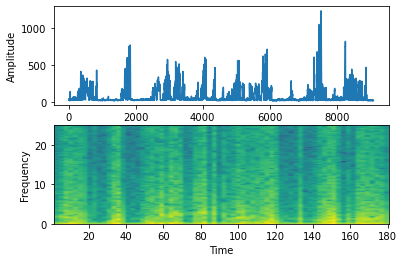

In [21]:
ch = df['Channel_1']

# Plot the signal
plt.subplot(211)
plt.plot(ch)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot the spectogram
plt.subplot(212)

powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(ch, Fs=freq)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()